In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from IPython.display import clear_output

# 训练
现在我们正式开始训练流程。训练流程有
 - 数据加载器：这一步会将数据转换成模型接受的向量形式
 - 模型构建：你要确保模型的接口是你想要的形式。我们目前有若干个特征（输入）和一个目标（输出）
 - 训练后预测：检查效果

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 加载数据
data_path = 'D:\REPO\steam_it_up\steam_train_scaled.csv'
data = pd.read_csv(data_path)

# 查看数据维度
print("数据集的维度: ", data.shape)  # 打印数据集的行数和列数

# 分割特征和目标变量
# 将数据集中除'target'列以外的所有列作为特征X
# 将'target'列作为目标变量y
X = data.drop('target', axis=1).values
y = data['target'].values

# 查看特征和目标变量的维度
print("特征X的维度: ", X.shape)  # 打印特征的维度（行数和列数）
print("目标变量y的维度: ", y.shape)  # 打印目标变量的维度（行数，只有一列）

# 划分训练集和验证集
# 使用train_test_split函数将数据集按7:3的比例划分为训练集和验证集
# test_size=0.3表示30%的数据用于验证集，70%的数据用于训练集
# random_state=112确保划分的随机性可重复
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=112)

# 查看划分后训练集和验证集的维度
print("训练集特征X_train的维度: ", X_train.shape)  # 打印训练集特征的维度
print("训练集目标变量y_train的维度: ", y_train.shape)  # 打印训练集目标变量的维度
print("验证集特征X_val的维度: ", X_val.shape)  # 打印验证集特征的维度
print("验证集目标变量y_val的维度: ", y_val.shape)  # 打印验证集目标变量的维度


数据集的维度:  (2888, 29)
特征X的维度:  (2888, 28)
目标变量y的维度:  (2888,)
训练集特征X_train的维度:  (2021, 28)
训练集目标变量y_train的维度:  (2021,)
验证集特征X_val的维度:  (867, 28)
验证集目标变量y_val的维度:  (867,)


根据数据维度信息的输出结果，可以解释如下：

1. **数据集的维度**：
    ```python
    数据集的维度:  (2888, 29)
    ```
    - 数据集总共有 2888 行和 29 列。
    - 这29列中，包括28个特征列和1个目标变量列（'target'）。

2. **特征X的维度**：
    ```python
    特征X的维度:  (2888, 28)
    ```
    - 特征矩阵 `X` 包含 2888 行和 28 列。
    - 这意味着从数据集中提取了28个特征列来构建特征矩阵。

3. **目标变量y的维度**：
    ```python
    目标变量y的维度:  (2888,)
    ```
    - 目标变量 `y` 是一个包含 2888 个元素的一维数组。
    - 每个元素对应数据集中每一行的目标值。

4. **训练集和验证集划分的维度**：
    - **训练集特征X_train的维度**：
        ```python
        训练集特征X_train的维度:  (2021, 28)
        ```
        - 训练集特征矩阵 `X_train` 包含 2021 行和 28 列。
        - 这意味着 2021 个样本（即 70% 的数据）用于训练模型。
        
    - **训练集目标变量y_train的维度**：
        ```python
        训练集目标变量y_train的维度:  (2021,)
        ```
        - 训练集目标变量 `y_train` 是一个包含 2021 个元素的一维数组。
        - 每个元素对应训练集中每一行的目标值。
        
    - **验证集特征X_val的维度**：
        ```python
        验证集特征X_val的维度:  (867, 28)
        ```
        - 验证集特征矩阵 `X_val` 包含 867 行和 28 列。
        - 这意味着 867 个样本（即 30% 的数据）用于验证模型。
        
    - **验证集目标变量y_val的维度**：
        ```python
        验证集目标变量y_val的维度:  (867,)
        ```
        - 验证集目标变量 `y_val` 是一个包含 867 个元素的一维数组。
        - 每个元素对应验证集中每一行的目标值。

### 总结

- **整体数据集**：包含 2888 个样本，29 列，其中 28 列是特征，1 列是目标变量。
- **特征矩阵 `X`**：包含 2888 个样本，28 列特征。
- **目标变量 `y`**：包含 2888 个样本的目标值。
- **训练集**：包含 2021 个样本，28 列特征（占总数据集的70%），以及相应的目标变量。
- **验证集**：包含 867 个样本，28 列特征（占总数据集的30%），以及相应的目标变量。


## 那么
我们构建模型的思路就很明确了：输入接口维度是28，输出接口维度是1

我在此沿用我以前的做法，构建一个ResNet进行训练。你可以用一个简单的全连接网络完成这个任务，可以自己动手试一试。

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 定义残差块
class ResidualBlock(nn.Module):
    def __init__(self, in_features, out_features, dropout_rate=0.5):
        super(ResidualBlock, self).__init__()
        self.fc = nn.Linear(in_features, out_features)
        self.bn = nn.BatchNorm1d(out_features)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.adjust_dimensions = nn.Linear(in_features, out_features) if in_features != out_features else nn.Identity()

    def forward(self, x):
        identity = self.adjust_dimensions(x)
        out = self.fc(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.dropout(out)
        out += identity
        out = self.relu(out)  # Activation after adding the identity
        return out

# 残差块是深度学习中一种常用的结构，通过引入跳过连接（残差连接）来帮助解决深度网络中的梯度消失问题。
# 在一个残差块中，输入不仅通过一系列层（如线性层、批量归一化层、激活层）进行处理，还会与这一系列层的输出相加，形成快捷路径。

# 具体来说，ResidualBlock 类包含以下组件：
# nn.Linear: 全连接层，将输入特征转换到新的空间，可以增加或减少特征维度。
# nn.BatchNorm1d: 批量归一化层，用于稳定和加速训练过程。
# nn.ReLU: 激活函数，引入非线性，使模型可以学习复杂特征。
# nn.Dropout: Dropout层，随机“丢弃”一些神经元的输出，作为正则化手段防止过拟合。
# adjust_dimensions: 如果输入和输出特征维度不匹配，这个线性层用于调整维度，使跳过连接的加法操作可以执行。

# 定义深度神经网络
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(DeepNeuralNetwork, self).__init__()
        self.layer1 = ResidualBlock(input_size, 256)
        self.layer2 = ResidualBlock(256, 128)
        self.layer3 = ResidualBlock(128, 64)
        self.layer4 = ResidualBlock(64, 32)
        self.layer5 = ResidualBlock(32, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.output(x)
        return x

# DeepNeuralNetwork类定义了一个包含五个残差块的深度网络。网络的结构如下：
# layer1: 第一个残差块，接收原始输入并转换为256维特征。
# layer2: 第二个残余块，将256维特征压缩到128维。
# layer3: 第三个残余块，进一步压缩特征到64维。
# layer4: 第四个残余块，将特征减少到32维。
# layer5: 第五个残余块，进一步将特征减少到16维。
# output: 最后一个全连接层，将16维特征转换为单个输出值。
# 在 forward 方法中，数据按照定义的顺序通过每一层，每个残差块接收上一层的输出作为输入，处理后传递到下一层。

# 定义训练设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 创建模型实例，传入输入的特征维度
model = DeepNeuralNetwork(X_train.shape[1]).to(device)

# 输出模型结构
print(model)

# 用一个测试张量检查模型输入和输出维度是否正确
model.eval()  # 设置模型为评估模式
sample_input = torch.randn((1, X_train.shape[1])).to(device)
with torch.no_grad():  # 在评估模式下禁用梯度计算
    sample_output = model(sample_input)
print(f"Sample output shape: {sample_output.shape}")


DeepNeuralNetwork(
  (layer1): ResidualBlock(
    (fc): Linear(in_features=28, out_features=256, bias=True)
    (bn): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
    (dropout): Dropout(p=0.5, inplace=False)
    (adjust_dimensions): Linear(in_features=28, out_features=256, bias=True)
  )
  (layer2): ResidualBlock(
    (fc): Linear(in_features=256, out_features=128, bias=True)
    (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
    (dropout): Dropout(p=0.5, inplace=False)
    (adjust_dimensions): Linear(in_features=256, out_features=128, bias=True)
  )
  (layer3): ResidualBlock(
    (fc): Linear(in_features=128, out_features=64, bias=True)
    (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
    (dropout): Dropout(p=0.5, inplace=False)
    (adjust_dimensions): Linear(in_features=128, out_features=64, bias=True)
  )
  (la

## 以下就是训练流程，我在这充分地使用了各种训练策略（实际上不需要，但只是为了展示），包括：

 * `weight_decay`：为了防止过拟合，在优化器中使用权重衰减（L2正则化）。
 * `dropout`：在之前的模型定义中使用Dropout层，随机丢弃部分神经元的输出，作为一种正则化手段来防止过拟合。
 * `early_stopping`：每100个epoch保存一次模型，如果验证集性能没有提升，可以恢复到较好的模型状态（在实际中可以进一步实现早停机制）。
 * `L1 regularization`：在损失函数中添加L1正则化项，进一步防止过拟合。
 * `learning_rate`：设置较小的学习率（3e-4），以稳定训练过程。
 * `实时绘图`：在训练过程中实时绘制损失、MAE、MSE和R²分数，以便观察模型性能的变化。
 * `HuberLoss`：使用Huber损失函数代替MSE损失，减少异常值的影响。

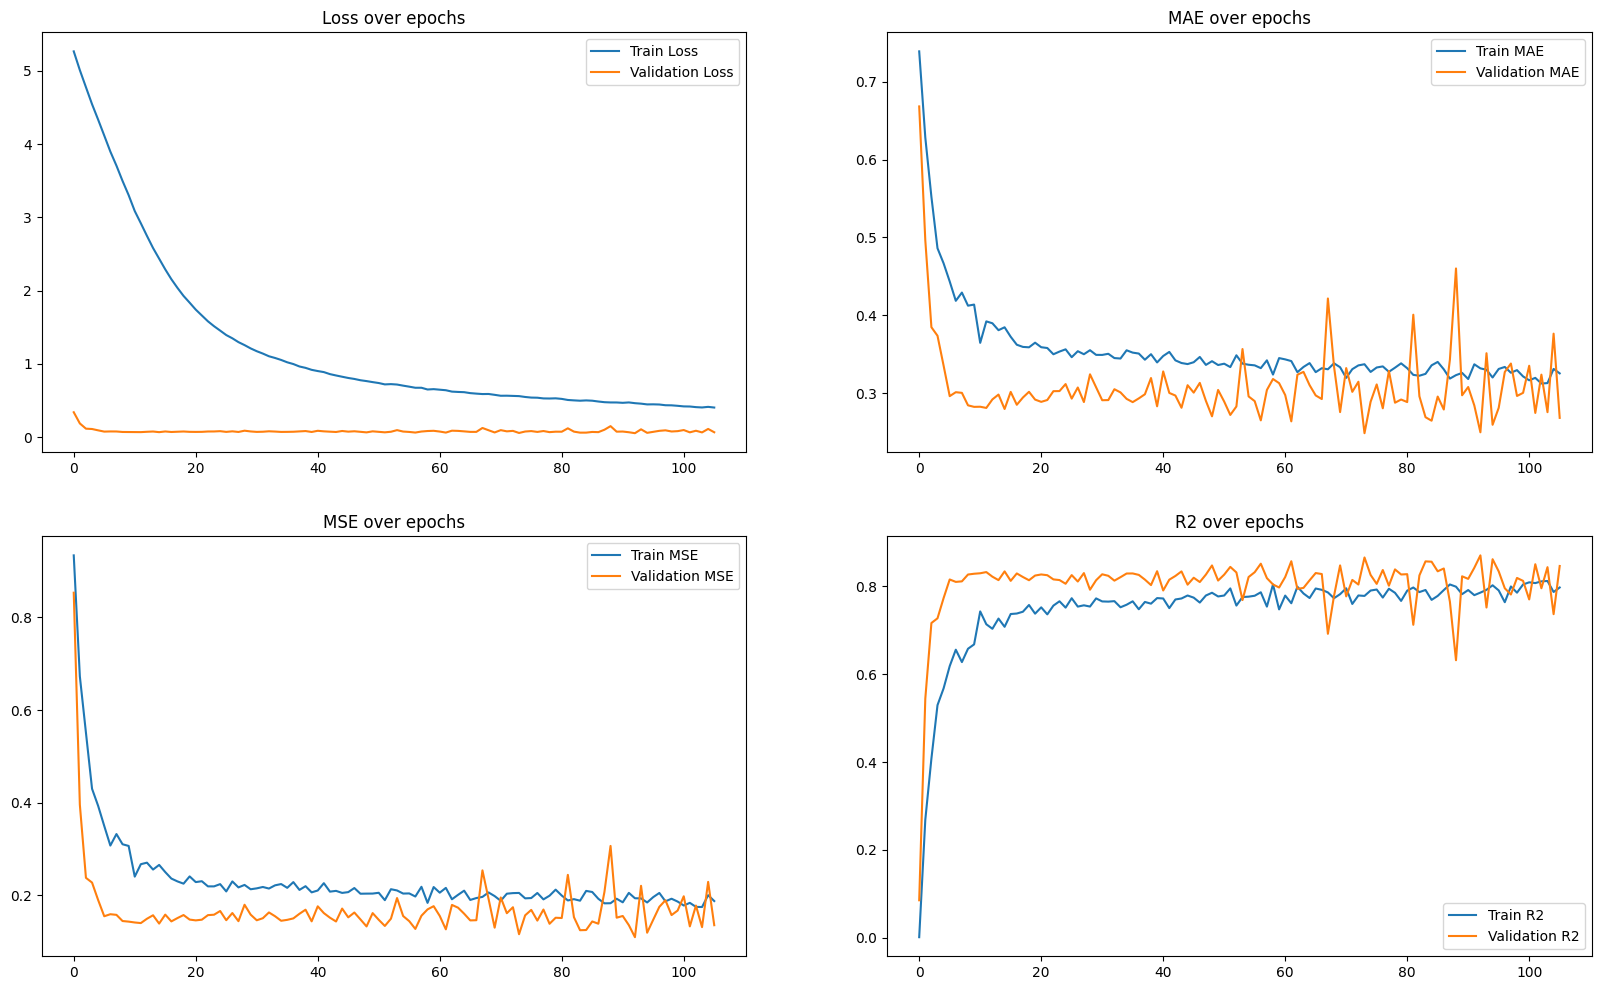

Epoch [106/1000], Loss: 0.4046, MAE: 0.3256, MSE: 0.1878, R2: 0.7972
Validation Loss: 0.0671, Validation MAE: 0.2685, Validation MSE: 0.1357, Validation R2: 0.8462


KeyboardInterrupt: 

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from IPython.display import clear_output

# 定义模型和损失函数
criterion = nn.HuberLoss()  # 使用 Huber 损失函数，你也可以使用MSELoss
optimizer = optim.Adam(model.parameters(), lr=3e-4, weight_decay=1e-4)

# 创建数据加载器
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

validation_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

# 定义评估指标
def mean_absolute_error(pred, target):
    return torch.mean(torch.abs(pred - target))

def mean_squared_error(pred, target):
    return torch.mean((pred - target) ** 2)

def r2_score(pred, target):
    mean_target = torch.mean(target)
    ss_total = torch.sum((target - mean_target) ** 2)
    ss_res = torch.sum((target - pred) ** 2)
    r2 = 1 - ss_res / ss_total
    return r2

# 定义 L1 正则化损失
def l1_regularization(model, lambda_l1):
    l1_loss = torch.tensor(0.0, requires_grad=True)
    for name, param in model.named_parameters():
        if 'weight' in name:
            l1_loss = l1_loss + torch.norm(param, 1)
    return lambda_l1 * l1_loss

# 训练参数
num_epochs = 1000 # 可以设置为100到500
train_losses, val_losses = [], []
train_mae, val_mae = [], []
train_mse, val_mse = [], []
train_r2, val_r2 = [], []

save_path = ''

# 训练和验证循环
for epoch in range(num_epochs):
    model.train()
    batch_losses, batch_mae, batch_mse, batch_r2 = [], [], [], []

    if (epoch + 1) % 100 == 0:
        # 每100个 epoch 保存一次模型
        torch.save(model.state_dict(), f"{save_path}model_epoch_{epoch+1}.pth")
        print(f"Saved PyTorch Model State to model_epoch_{epoch+1}.pth")

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        l1_loss = l1_regularization(model, lambda_l1=1e-3)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss = loss + l1_loss

        loss.backward()
        optimizer.step()

        batch_losses.append(loss.item())
        batch_mae.append(mean_absolute_error(outputs, labels.unsqueeze(1)).item())
        batch_mse.append(mean_squared_error(outputs, labels.unsqueeze(1)).item())
        batch_r2.append(r2_score(outputs, labels.unsqueeze(1)).item())

    train_losses.append(sum(batch_losses) / len(batch_losses))
    train_mae.append(sum(batch_mae) / len(batch_mae))
    train_mse.append(sum(batch_mse) / len(batch_mse))
    train_r2.append(sum(batch_r2) / len(batch_r2))

    model.eval()
    with torch.no_grad():
        val_batch_losses, val_batch_mae, val_batch_mse, val_batch_r2 = [], [], [], []
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            val_batch_losses.append(loss.item())
            val_batch_mae.append(mean_absolute_error(outputs, labels.unsqueeze(1)).item())
            val_batch_mse.append(mean_squared_error(outputs, labels.unsqueeze(1)).item())
            val_batch_r2.append(r2_score(outputs, labels.unsqueeze(1)).item())

        val_losses.append(sum(val_batch_losses) / len(val_batch_losses))
        val_mae.append(sum(val_batch_mae) / len(val_batch_mae))
        val_mse.append(sum(val_batch_mse) / len(val_batch_mse))
        val_r2.append(sum(val_batch_r2) / len(val_batch_r2))

    # 实时绘图更新
    clear_output(wait=True)
    plt.figure(figsize=(20, 12))

    plt.subplot(2, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss over epochs')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(train_mae, label='Train MAE')
    plt.plot(val_mae, label='Validation MAE')
    plt.title('MAE over epochs')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(train_mse, label='Train MSE')
    plt.plot(val_mse, label='Validation MSE')
    plt.title('MSE over epochs')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(train_r2, label='Train R2')
    plt.plot(val_r2, label='Validation R2')
    plt.title('R2 over epochs')
    plt.legend()

    plt.show()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, MAE: {train_mae[-1]:.4f}, MSE: {train_mse[-1]:.4f}, R2: {train_r2[-1]:.4f}")
    print(f"Validation Loss: {val_losses[-1]:.4f}, Validation MAE: {val_mae[-1]:.4f}, Validation MSE: {val_mse[-1]:.4f}, Validation R2: {val_r2[-1]:.4f}")


# 训练后预测
训练完毕，我们查看预测效果

In [7]:
import torch
import pandas as pd

# 假设 X_val 是一个 numpy 数组，首先转换它
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)

# 如果使用 GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_val_tensor = X_val_tensor.to(device)

# 将模型设置为评估模式
model.eval()

# 关闭梯度计算
with torch.no_grad():
    predictions_tensor = model(X_val_tensor)
    predictions = predictions_tensor.cpu().numpy().flatten()  # 将预测结果移回 CPU 并转换为一维 numpy 数组


# 创建 DataFrame 以保存和显示实际值和预测值
results = pd.DataFrame({
    'Actual': y_val,
    'Predicted': predictions
})
print(results)

# 将结果保存到 CSV 文件
results.to_csv('predictions.csv', index=False)
print("Results saved to 'predictions.csv'")


     Actual  Predicted
0    -2.386  -1.481073
1     0.225   0.588954
2    -0.413   0.282761
3     0.807   0.975025
4     1.191   1.103604
..      ...        ...
862   0.817   0.810918
863  -2.663  -2.150204
864   0.194   0.508604
865   1.218   1.017135
866  -0.138   0.149350

[867 rows x 2 columns]
Results saved to 'predictions.csv'


In [8]:
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
model.eval()

with torch.no_grad():
    predictions_tensor = model(X_val_tensor)
    predictions = predictions_tensor.cpu().numpy().flatten()  # 转换回 NumPy 以便使用 scikit-learn


# 使用 NumPy 计算 MSE 和 MAE
mse = np.mean((y_val - predictions) ** 2)
mae = np.mean(np.abs(y_val - predictions))

# 计算 RMSE
rmse = np.sqrt(mse)

# 输出结果
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

# 计算 R²
r2 = r2_score(y_val, predictions)
print("R^2:", r2)


Mean Squared Error: 0.1451214599957851
Root Mean Squared Error: 0.38094810669668
Mean Absolute Error: 0.2812642455013015
R^2: 0.8521996767312426


验证集R2有0.85以上，是很不错的效果。但因为我手头上的测试集数据是没有target的，所以这里只能用验证集做示范。

---

# 总之
写代码最重要的是思想，想清楚你要干什么，具体你知不知道怎么干不重要。这不是死记烂背学英语，而是遇到什么不会就去查什么，这个过程中，知道自己干什么是最重要的。

我们在这里的目标就是预测，为了预测我们要构建合适维度的模型，在构建模型之前我们需要调整好数据，无论正演还是反演，都是一样的思想、大致的步骤。